<a href="https://colab.research.google.com/github/NicholusKenyatta01/CodeAlpha_Data_science_Projects/blob/main/Titanic_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import important tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show first few passengers
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#I am bringing in the tools I need to work with data, draw charts, and train our machine learning models.
#I am also loading the Titanic dataset from the internet.

In [ ]:
#STEP2 Clean the Data and Create New Features

In [20]:
def enhance_data(df):
    # 1. Extract titles like Mr, Mrs, Miss
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

    # 2. Total family members onboard
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # 3. Fill missing Age, then group into AgeGroup
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 120], labels=[1, 2, 3, 4]).astype(float)

    # 4. Fill missing Fare, group into price levels
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(float)

    # 5. Convert gender to numbers
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # 6. Fill missing 'Embarked' and one-hot encode it
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
    df = pd.concat([df, embarked_dummies], axis=1)

    # 7. One-hot encode Title
    title_dummies = pd.get_dummies(df['Title'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)

    # 8. Drop unnecessary columns
    df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Title'], errors='ignore', inplace=True)

    return df

# Apply function
df = enhance_data(df.copy())


<ipython-input-20-0d821f2ed38f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-20-0d821f2ed38f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
#Step3  Analysis and Data Visualization

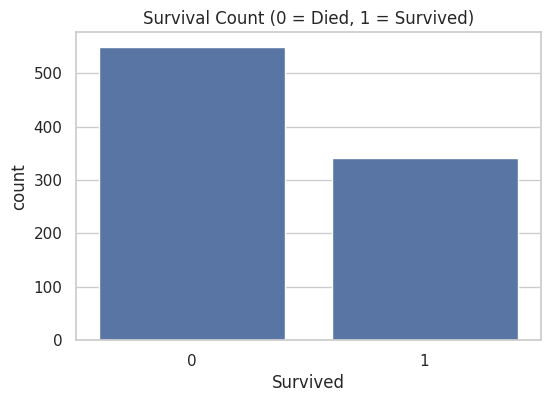

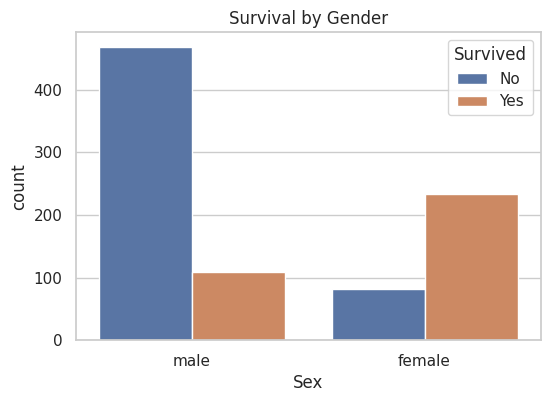

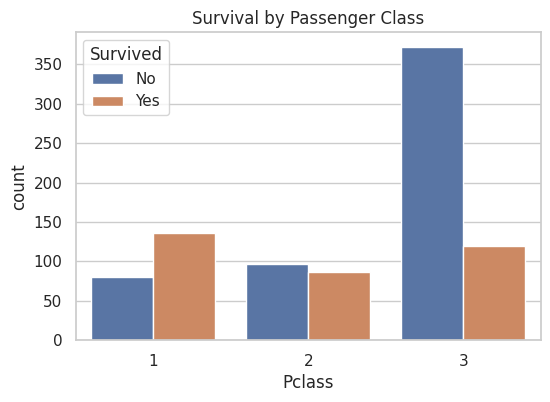

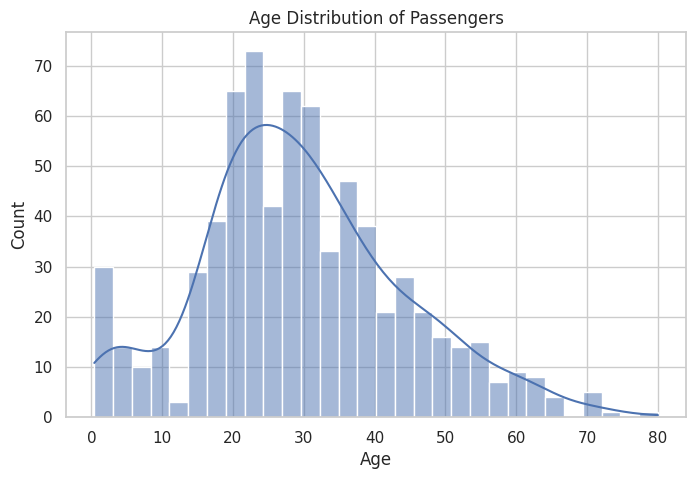

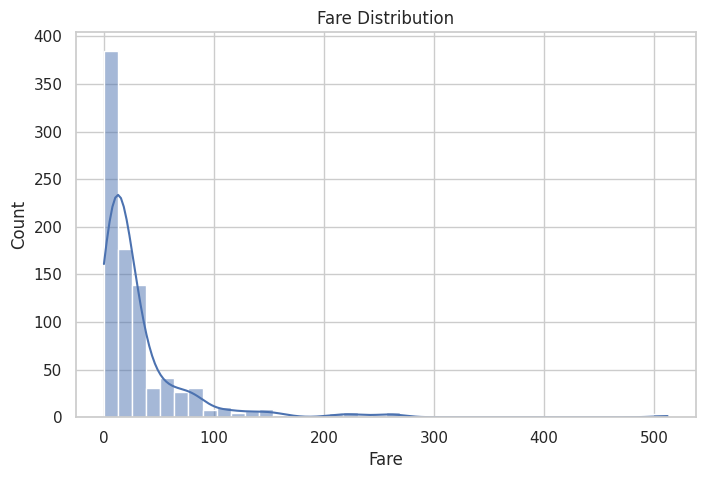

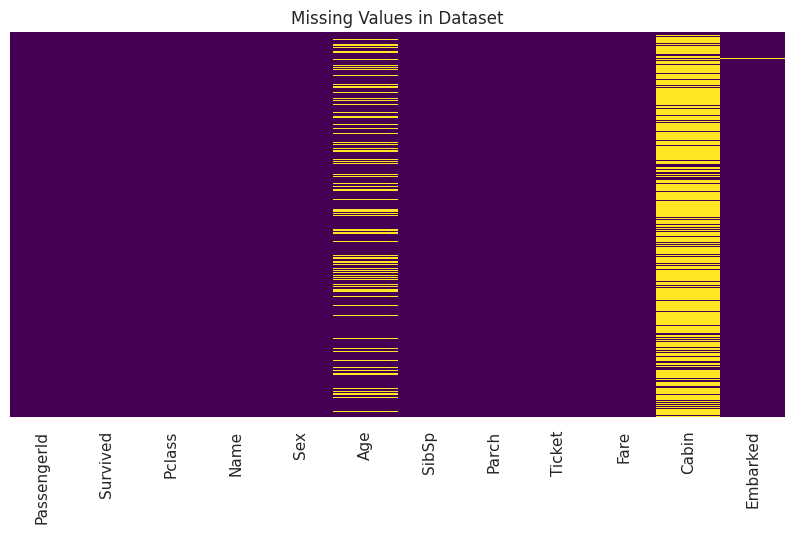

In [27]:

# Set plot style
sns.set(style="whitegrid")

# 1. Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df_raw)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# 2. Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df_raw)
plt.title("Survival by Gender")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 3. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df_raw)
plt.title("Survival by Passenger Class")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 4. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 5. Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# 6. Heatmap of Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df_raw.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()


In [ ]:
#STEP 4 Split the data for traiing and testing.

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#We clean the data by fixing missing values and creating new "smart" columns like:

#Title (Mr, Miss, etc.)

#FamilySize and IsAlone

#AgeGroup and FareGroup
#We also turn text into numbers so the computer can understand it

In [ ]:
#We divide the data:

#80% for training the computer to learn

#20% for testing to check how well it learned

In [ ]:
#Step 5 Train Multiple Models and Compare

In [25]:
# Create models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    "Support Vector Machine": SVC(probability=True)
}

# Train and test each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f" {name} Accuracy: {acc:.4f}")


 Logistic Regression Accuracy: 0.8101
 Random Forest Accuracy: 0.8380
 Gradient Boosting Accuracy: 0.8324
 Support Vector Machine Accuracy: 0.6592


In [ ]:
#We train 4 different machine learning models and compare how accurate they are.

In [ ]:
#Step 6: Combine Models (Voting Classifier)

In [23]:
# Combine best models into a voting system
voting = VotingClassifier(
    estimators=[
        ('gb', models["Gradient Boosting"]),
        ('rf', models["Random Forest"]),
        ('lr', models["Logistic Regression"])
    ],
    voting='soft'
)

voting.fit(X_train, y_train)
y_pred_vote = voting.predict(X_test)

# Evaluation
print("\n🗳️ Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))



🗳️ Voting Classifier Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
#Build a "super team" by combining the 3 best models to make one stronger model

In [ ]:
# Step 7 Show most important features

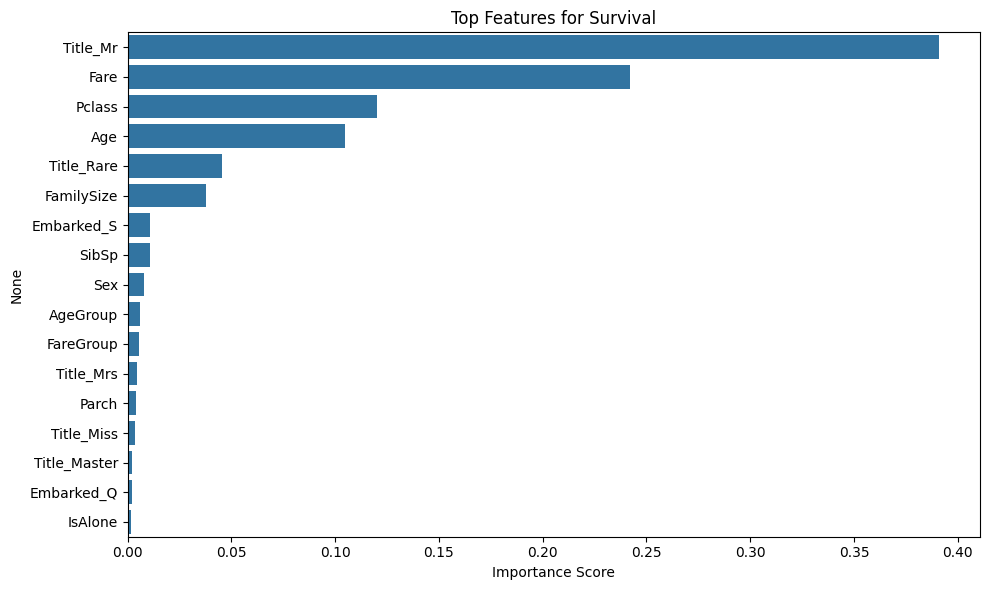

In [24]:
importances = pd.Series(models["Gradient Boosting"].feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Top Features for Survival")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
#BUILD AND COMPARE MODELS